In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import plotly.express as px
import pandas as pd

In [27]:
df = pd.read_csv("data/1950-2019_all_tornadoes.csv")
df

om    yr  mo  dy        date      time  tz  st  stf  stn  ...  \
0           1  1950   1   3  1950-01-03  11:00:00   3  MO   29    1  ...   
1           1  1950   1   3  1950-01-03  11:00:00   3  MO   29    1  ...   
2           1  1950   1   3  1950-01-03  11:10:00   3  IL   17    1  ...   
3           2  1950   1   3  1950-01-03  11:55:00   3  IL   17    2  ...   
4           3  1950   1   3  1950-01-03  16:00:00   3  OH   39    1  ...   
...       ...   ...  ..  ..         ...       ...  ..  ..  ...  ...  ...   
66383  618537  2019  12  29  2019-12-29  16:03:00   3  MS   28    0  ...   
66384  618538  2019  12  29  2019-12-29  16:13:00   3  MS   28    0  ...   
66385  618539  2019  12  29  2019-12-29  16:32:00   3  MS   28    0  ...   
66386  618540  2019  12  29  2019-12-29  17:13:00   3  MS   28    0  ...   
66387  618541  2019  12  29  2019-12-29  18:50:00   3  AL    1    0  ...   

        len  wid  ns  sn  sg   f1  f2  f3  f4  fc  
0      9.50  150   2   0   1    0   0   0   0   0  
1      6.20  150   2   1   2  189   0   0   0   0  
2      3.30  100   2   1   2  119   0   0   0   0  
3      3.60  130   1   1   1  135   0   0   0   0  
4      0.10   10   1   1   1  161   0   0   0   0  
...     ...  ...  ..  ..  ..  ...  ..  ..  ..  ..  
66383  7.70  900   1   1   1    7   0   0   0   0  
66384  3.82  200   1   1   1   19   0   0   0   0  
66385  2.61  200   1   1   1  105   0   0   0   0  
66386  3.23  125   1   1   1  101   0   0   0   0  
66387  5.07   50   1   1   1   83   0   0   0   0  

[66388 rows x 29 columns]

In [28]:
df['group'] = df['st']

In [29]:
df['group']=df['group'].replace({
'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
})

In [30]:
df1 = df[[
'yr',
'mo',
'date',
'st',
'mag',
'inj',
'fat',
'loss',
'closs',
'len',
'wid',
'slat',
'slon',
'group']]
df1.head()

yr  mo        date  st  mag  inj  fat  loss  closs  len  wid   slat  \
0  1950   1  1950-01-03  MO    3    3    0   6.0    0.0  9.5  150  38.77   
1  1950   1  1950-01-03  MO    3    3    0   6.0    0.0  6.2  150  38.77   
2  1950   1  1950-01-03  IL    3    0    0   5.0    0.0  3.3  100  38.82   
3  1950   1  1950-01-03  IL    3    3    0   5.0    0.0  3.6  130  39.10   
4  1950   1  1950-01-03  OH    1    1    0   4.0    0.0  0.1   10  40.88   

    slon group  
0 -90.22     M  
1 -90.22     M  
2 -90.12     M  
3 -89.30     M  
4 -84.58     M

In [31]:
data = {'StName':['Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming']}

df = pd.DataFrame(data)
cw_location = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/'
cw_filename = 'state_codes.html'

states = pd.read_html(cw_location + cw_filename)[0]
state_code_map = dict(zip(states['Description'], 
                          states['Code']))
df['StAbbr'] = df['StName'].map(state_code_map)
code_state_map = dict(zip(states['Code'],
                          states['Description']))
df['StNameAgain'] = df['StAbbr'].map(code_state_map)
df
df = df.rename(columns={'stName': 'State_Name', 'StAbbr': 'st'})
df.head()

StName  st StNameAgain
0     Alabama  AL     Alabama
1      Alaska  AK      Alaska
2     Arizona  AZ     Arizona
3    Arkansas  AR    Arkansas
4  California  CA  California

In [32]:
new_df2 = pd.merge(df1, df, on='st', how='left')
new_df2
df3 = new_df2[[
'yr',
'mo',
'date',
'st',
'StName',
'mag',
'inj',
'fat',
'loss',
'closs',
'len',
'wid',
'slat',
'slon',
'group']]
df3

yr  mo        date  st       StName  mag  inj  fat      loss  closs  \
0      1950   1  1950-01-03  MO     Missouri    3    3    0       6.0    0.0   
1      1950   1  1950-01-03  MO     Missouri    3    3    0       6.0    0.0   
2      1950   1  1950-01-03  IL     Illinois    3    0    0       5.0    0.0   
3      1950   1  1950-01-03  IL     Illinois    3    3    0       5.0    0.0   
4      1950   1  1950-01-03  OH         Ohio    1    1    0       4.0    0.0   
...     ...  ..         ...  ..          ...  ...  ...  ...       ...    ...   
66383  2019  12  2019-12-29  MS  Mississippi    1    0    0   75000.0    0.0   
66384  2019  12  2019-12-29  MS  Mississippi    1    0    0   10000.0    0.0   
66385  2019  12  2019-12-29  MS  Mississippi    0    0    0    5000.0    0.0   
66386  2019  12  2019-12-29  MS  Mississippi    1    0    0  150000.0    0.0   
66387  2019  12  2019-12-29  AL      Alabama    0    0    0       0.0    0.0   

        len  wid     slat     slon group  
0      9.50  150  38.7700 -90.2200     M  
1      6.20  150  38.7700 -90.2200     M  
2      3.30  100  38.8200 -90.1200     M  
3      3.60  130  39.1000 -89.3000     M  
4      0.10   10  40.8800 -84.5800     M  
...     ...  ...      ...      ...   ...  
66383  7.70  900  33.1628 -89.4323     S  
66384  3.82  200  33.2598 -89.2778     S  
66385  2.61  200  33.4720 -89.0315     S  
66386  3.23  125  32.5268 -89.1628     S  
66387  5.07   50  34.7541 -87.0777     S  

[66388 rows x 15 columns]

In [33]:
df3 = df3.rename(columns={ "StName": "name", "yr": "year"})

In [34]:
df3["value"] = df3.groupby("name").cumcount()+1

In [35]:
df = df3

In [36]:
df = df[['name', 'group', 'year', 'value']]
df.tail(59)

name group  year  value
66329      Florida     S  2019   3416
66330      Florida     S  2019   3417
66331    Louisiana     S  2019   2174
66332    Louisiana     S  2019   2175
66333    Louisiana     S  2019   2176
66334    Louisiana     S  2019   2177
66335  Mississippi     S  2019   2363
66336    Louisiana     S  2019   2178
66337  Mississippi     S  2019   2364
66338  Mississippi     S  2019   2365
66339  Mississippi     S  2019   2366
66340  Mississippi     S  2019   2367
66341  Mississippi     S  2019   2368
66342    Louisiana     S  2019   2179
66343  Mississippi     S  2019   2369
66344  Mississippi     S  2019   2370
66345  Mississippi     S  2019   2371
66346  Mississippi     S  2019   2372
66347  Mississippi     S  2019   2373
66348  Mississippi     S  2019   2374
66349  Mississippi     S  2019   2375
66350      Alabama     S  2019   2288
66351      Alabama     S  2019   2289
66352    Tennessee     S  2019   1273
66353  Mississippi     S  2019   2376
66354      Alabama     S  2019   2290
66355  Mississippi     S  2019   2377
66356  Mississippi     S  2019   2378
66357      Alabama     S  2019   2291
66358      Alabama     S  2019   2292
66359    Tennessee     S  2019   1274
66360    Tennessee     S  2019   1275
66361      Alabama     S  2019   2293
66362  Mississippi     S  2019   2379
66363  Mississippi     S  2019   2380
66364      Alabama     S  2019   2294
66365      Alabama     S  2019   2295
66366      Alabama     S  2019   2296
66367      Alabama     S  2019   2297
66368      Alabama     S  2019   2298
66369      Alabama     S  2019   2299
66370      Alabama     S  2019   2300
66371      Georgia     S  2019   1746
66372      Alabama     S  2019   2301
66373      Georgia     S  2019   1747
66374      Georgia     S  2019   1748
66375      Georgia     S  2019   1749
66376   California     W  2019    451
66377   New Mexico     W  2019    616
66378     Oklahoma     S  2019   4073
66379     Missouri     M  2019   2440
66380  Mississippi     S  2019   2381
66381  Mississippi     S  2019   2382
66382  Mississippi     S  2019   2383
66383  Mississippi     S  2019   2384
66384  Mississippi     S  2019   2385
66385  Mississippi     S  2019   2386
66386  Mississippi     S  2019   2387
66387      Alabama     S  2019   2302

In [37]:
df['group']=df['group'].replace({
        'M': 'Midwest',
        'S': 'South',
        'W': 'West',
        'N': 'North',
})

<ipython-input-37-e0576fa68dc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group']=df['group'].replace({


In [38]:
test = df.groupby(['year', 'name']).max()
test.head(50)

group  value
year name                          
1950 Alabama           South      2
     Arkansas          South     12
     Colorado           West      2
     Connecticut       North      2
     Florida           South      6
     Georgia           South      4
     Illinois        Midwest      9
     Indiana         Midwest      3
     Iowa            Midwest      4
     Kansas          Midwest     30
     Kentucky          South      2
     Louisiana         South     21
     Maryland          North      1
     Minnesota       Midwest      1
     Mississippi       South     16
     Missouri        Midwest      7
     Nebraska           West      6
     New Mexico         West      2
     North Carolina    South      9
     North Dakota    Midwest      2
     Ohio            Midwest      3
     Oklahoma          South     23
     Pennsylvania      North      5
     South Carolina    South      1
     South Dakota    Midwest      1
     Tennessee         South      3
     Texas             South     20
     West Virginia     South      1
     Wisconsin       Midwest      5
     Wyoming            West      3
1951 Alabama           South      7
     Arkansas          South     15
     California         West      1
     Colorado           West     10
     Connecticut       North      5
     Florida           South     15
     Georgia           South      7
     Illinois        Midwest     14
     Indiana         Midwest      7
     Iowa            Midwest      9
     Kansas          Midwest    107
     Kentucky          South      4
     Louisiana         South     30
     Massachusetts     North      2
     Michigan           West      8
     Minnesota       Midwest      4
     Mississippi       South     24
     Missouri        Midwest     13
     Nebraska           West     15
     New Hampshire     North      1

In [39]:
test = test.reset_index()
test = test.set_index('name')

In [40]:
test = test.reset_index()

In [41]:
test = test[['name', 'group', 'year', 'value']]
test

name    group  year  value
0           Alabama    South  1950      2
1          Arkansas    South  1950     12
2          Colorado     West  1950      2
3       Connecticut    North  1950      2
4           Florida    South  1950      6
...             ...      ...   ...    ...
2977       Virginia    South  2019    776
2978     Washington     West  2019    124
2979  West Virginia    South  2019    154
2980      Wisconsin  Midwest  2019   1432
2981        Wyoming     West  2019    715

[2982 rows x 4 columns]

In [42]:
current_year = 2019
dff = (test[test['year'].eq(current_year)]
       .sort_values(by='value', ascending=True)
       .head(10))
dff

name  group  year  value
2971   Rhode Island  North  2019     15
2976        Vermont  North  2019     48
2942       Delaware  North  2019     65
2961         Nevada   West  2019     94
2941    Connecticut  North  2019    110
2969         Oregon   West  2019    122
2978     Washington   West  2019    124
2952          Maine  North  2019    135
2979  West Virginia  South  2019    154
2962     New Jersey  North  2019    160

<BarContainer object of 10 artists>

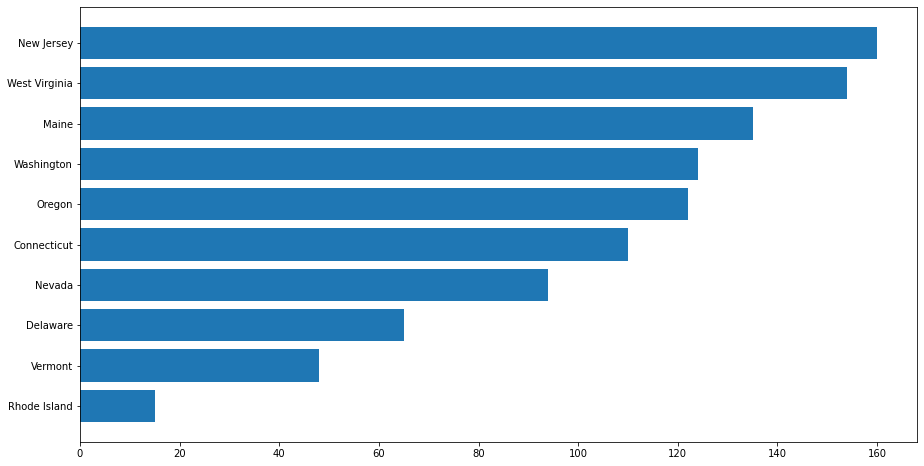

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['name'], dff['value'])

In [44]:
colors = dict(zip(
    ['South', 'West', 'North',
     'Midwest'],
    ['#ffb3ff', '#90d595', '#e48381',
     '#aafbff']
))
group_lk = df.set_index('name')['group'].to_dict()

Text(1, 0.4, '2019')

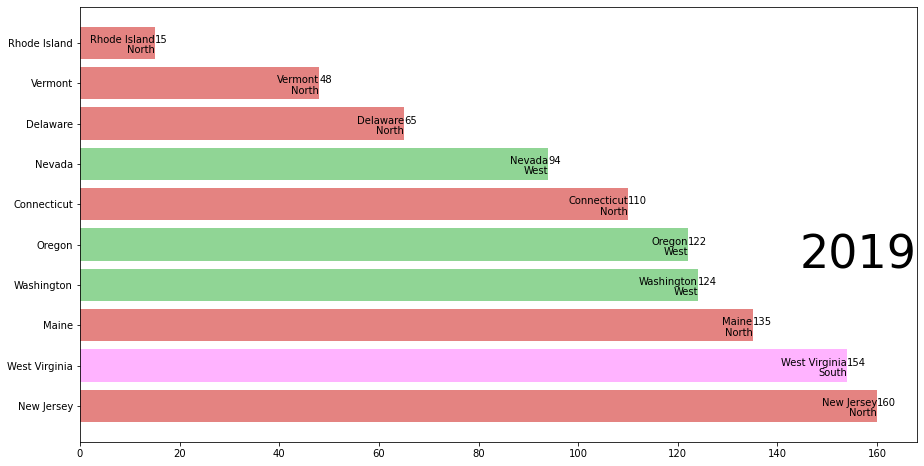

In [45]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# iterate over the values to plot labels and values 
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  
    ax.text(value, i-.25, group_lk[name],  ha='right')  
    ax.text(value, i,     value,           ha='left')   
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

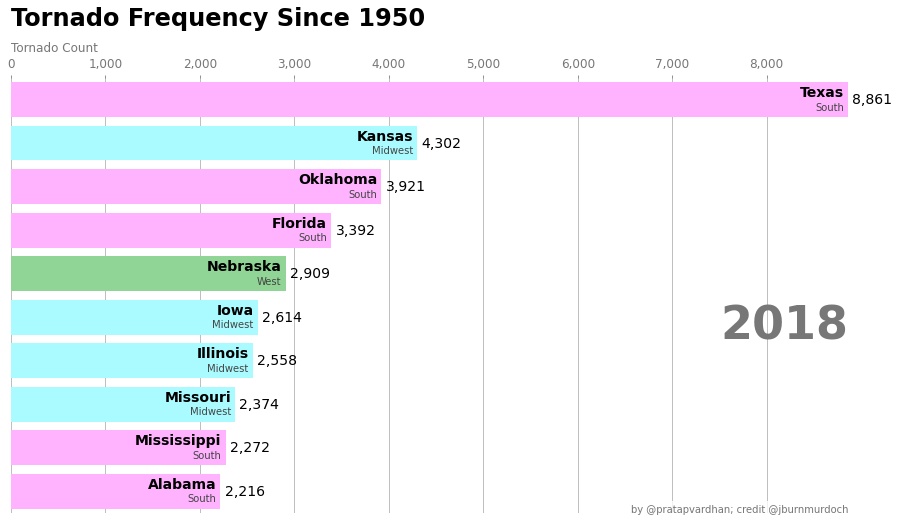

In [47]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(year):
    dff = test[test['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Tornado Count', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Tornado Frequency Since 1950',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(2018)

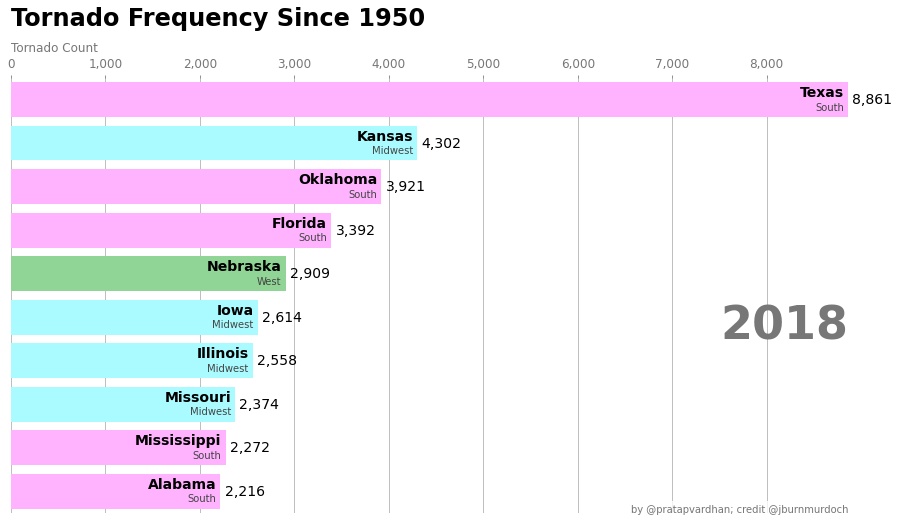

In [49]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1950, 2019))
HTML(animator.to_jshtml())

In [50]:
test['name']=test['name'].replace({
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'})
test

name    group  year  value
0      AL    South  1950      2
1      AR    South  1950     12
2      CO     West  1950      2
3      CT    North  1950      2
4      FL    South  1950      6
...   ...      ...   ...    ...
2977   VA    South  2019    776
2978   WA     West  2019    124
2979   WV    South  2019    154
2980   WI  Midwest  2019   1432
2981   WY     West  2019    715

[2982 rows x 4 columns]

In [54]:
maps = px.choropleth(test, 
              locations = 'name',
              color="value", 
              animation_frame="year",
              color_continuous_scale="sunset",
              locationmode='USA-states',
              scope="usa",
              range_color=(0, 800),
              title='Tornado Frequency 1950-2019',
              height=600
             )

In [55]:
maps

In [58]:
maps.write_html("fatalities_map.html")